In [36]:
import pandas as pd
import numpy as np
import timeit

from matplotlib import pyplot as plt
from matplotlib import rcParams
plt.style.use('ggplot')
rcParams['figure.figsize'] = (20.0, 10.0)
from matplotlib import colors

import scipy.stats

%matplotlib inline

In [37]:
import plot
import calculate

In [38]:
CAREER_LENGTH = 5 #this defines the criterion which we use to filter authors

MAX_CAREER_LENGTH_COHORT = 15    # this defines how long we follow each cohort


In [39]:
# Publication data
authorPublicationData = pd.read_csv('data/author_publications_2017_asiansAsNone.txt')
author_year_numPub = authorPublicationData.groupby(['author', 'year'])['pub_id'].count()

print("authorPublicationData no duplicates: ", authorPublicationData.shape[0])

#print(authorPublicationData.head())


authorPublicationData no duplicates:  9471668


In [40]:
credible_authors = pd.read_csv('data/authors-scientific-atleast-'+ str(CAREER_LENGTH) + '-year_extended.csv', encoding='utf-8')

In [41]:
credible_authors = credible_authors.set_index('start_year')

print("credible_authors: ", credible_authors.shape[0])
print(credible_authors.head())

#print(credible_authors[credible_authors['author'] == 'donatella sciuto'])
credible_authors.rename(columns={'num_pub':'total_num_pub'}, inplace=True)



credible_authors:  503859
                      author  end_year  num_pub  career_length  \
start_year                                                       
2001        'maseka lesaoana      2015        2             15   
2005           sheldon dealy      2009        2              5   
1985         sheldon epstein      1996        4             12   
2010           sheldon green      2014        3              5   
2002        sheldon j. mckay      2016        7             15   

            early_career_prod  early_career_prod_1  early_career_prod_2  \
start_year                                                                
2001                        1                    1                    1   
2005                        1                    1                    1   
1985                        1                    1                    1   
2010                        1                    1                    1   
2002                        1                    1           

                        author  end_year  total_num_pub  career_length  \
start_year                                                               
1980        shigeyoshi tsutsui      2015             55             36   
1980           sheng-lung peng      2016             58             37   

            early_career_prod  early_career_prod_1  early_career_prod_2  \
start_year                                                                
1980                        1                    1                    1   
1980                        1                    1                    1   

            early_career_qual  final_citation_count gender  
start_year                                                  
1980                        0                 612.0   none  
1980                      171                 538.0   none  
                      author  end_year  total_num_pub  career_length  \
start_year                                                             
1981         s

C:\Users\wagnerca\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


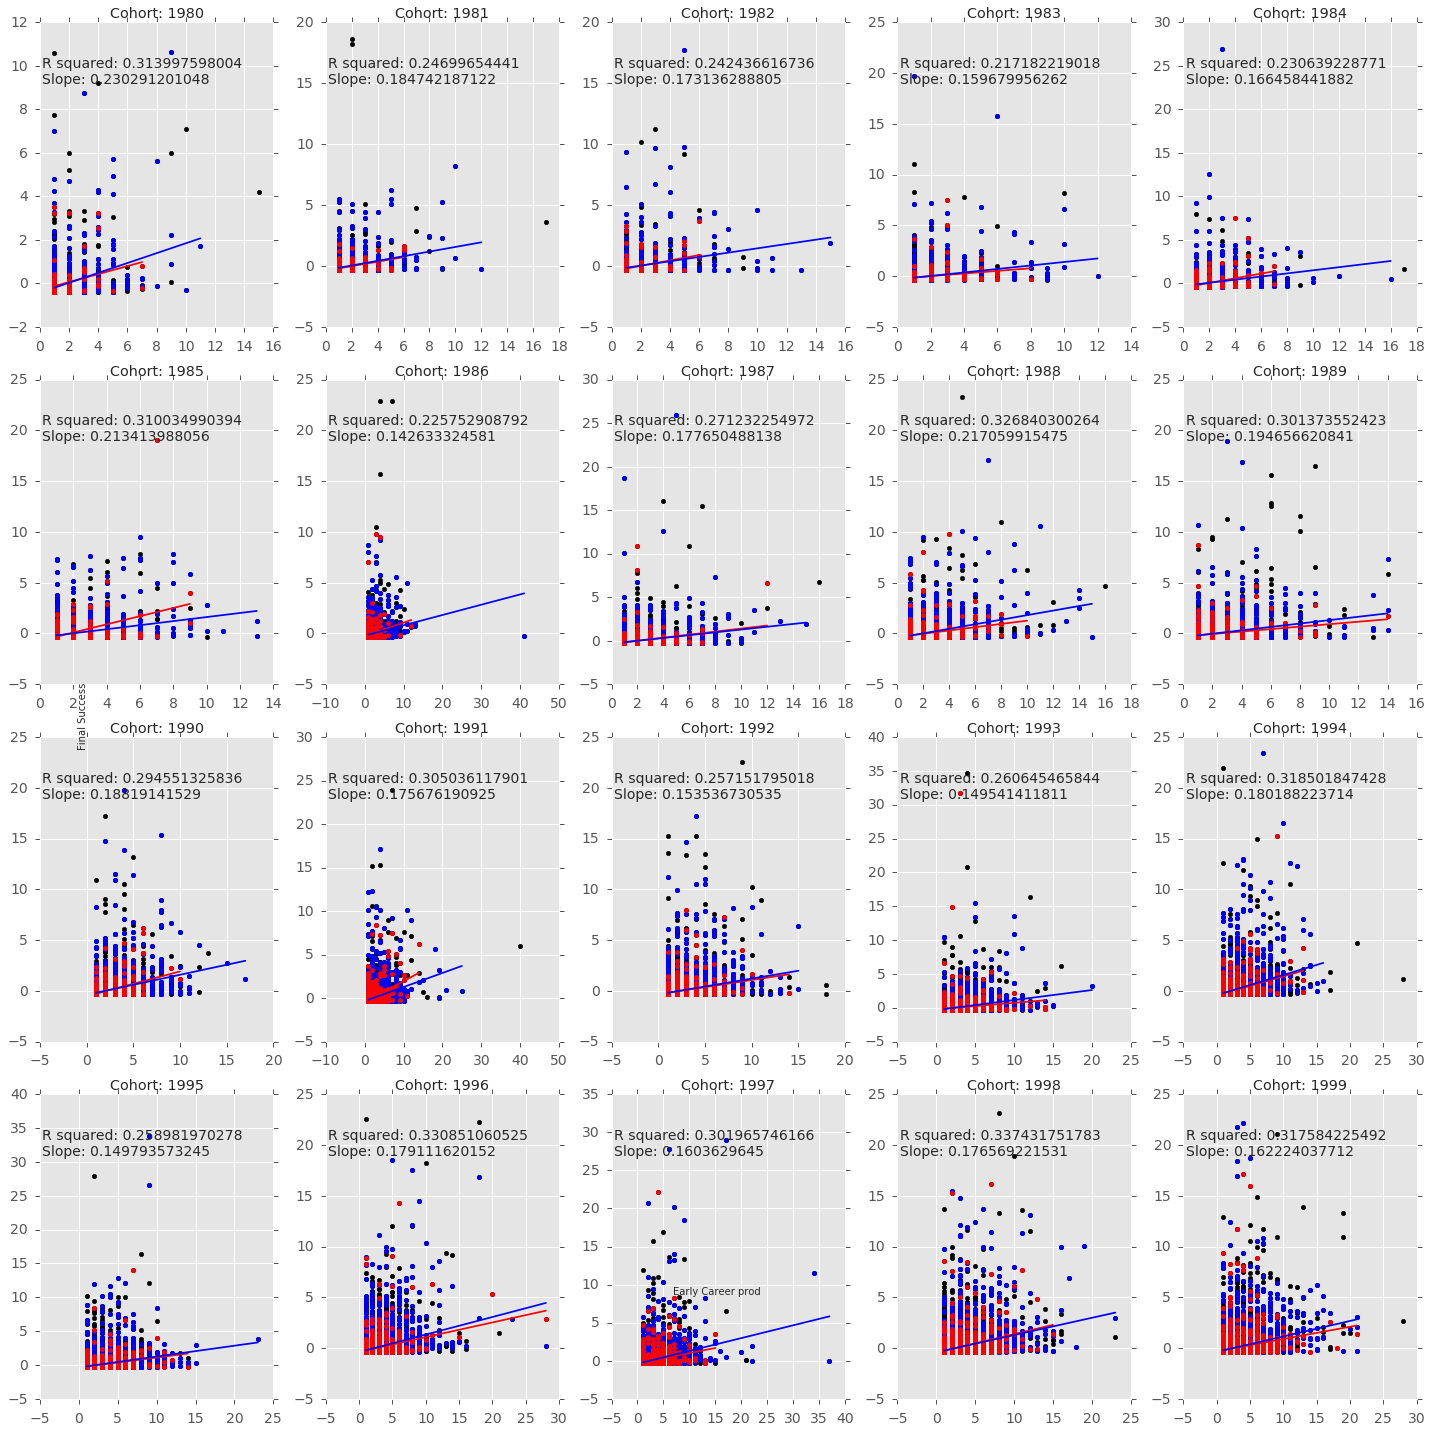

     year  num_obs  group     slope  intercept   r_value       p_value  \
0  1980.0   1361.0    all  0.230291  -0.411512  0.313998  1.598583e-32   
1  1980.0    782.0    men  0.226857  -0.424681  0.325885  8.350330e-21   
2  1980.0    101.0  women  0.183878  -0.307187  0.269597  6.403575e-03   
3  1981.0   1536.0    all  0.184742  -0.328831  0.246997  8.789008e-23   
4  1981.0    870.0    men  0.190435  -0.339398  0.311646  4.754907e-21   

    std_err  
0  0.018889  
1  0.023565  
2  0.066010  
3  0.018505  
4  0.019708  


In [42]:
from matplotlib.lines import Line2D

zscore = True
numcols = 5
start_range = 1980
end_range = 2000
cells = end_range - start_range
numrows = int(cells/numcols)

var = "prod" # can also be qual

results = pd.DataFrame(columns=["year", "num_obs", "group", "slope", "intercept", "r_value", "p_value", "std_err"])
fig, ax = plt.subplots(nrows=numrows, ncols=numcols, sharex=False, sharey=False, figsize=(20,20))


custom_lines = [Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='black', lw=4)]
for year in range(start_range, end_range):
    data = credible_authors.loc[year]
    x = data['early_career_prod']
    
    
    if(zscore):
        y = (data['final_citation_count']-np.mean(data['final_citation_count']))/np.std(data['final_citation_count'])
    else:
        y = data['final_citation_count']/np.sum(data['final_citation_count'])
   
    x_f = data[data.gender == 'f']['early_career_prod']
    if(zscore):
        y_f = (data[data.gender == 'f']['final_citation_count']-np.mean(data['final_citation_count']))/np.std(data['final_citation_count'])
    else:
        y_f = data[data.gender == 'f']['final_citation_count']/np.sum(data['final_citation_count'])
    
    x_m = data[data.gender == 'm']['early_career_prod']
    if(zscore):
        y_m = (data[data.gender == 'm']['final_citation_count']-np.mean(data['final_citation_count']))/np.std(data['final_citation_count'])
    else:
        y_m = data[data.gender == 'm']['final_citation_count']/np.sum(['final_citation_count'])
    

    axes = ax[(year-start_range)//numcols,year%start_range%numcols]
    axes.scatter(x, y, color="black")
    axes.scatter(x_m, y_m, color="blue")
    axes.scatter(x_f, y_f, color="red")
    fit = np.polyfit(x, y, deg=1)
    fit_f = np.polyfit(x_f, y_f, deg=1)
    fit_m = np.polyfit(x_m, y_m, deg=1)
    #axes.plot(x, fit[0] * x + fit[1], color='black')
    axes.plot(x_f, fit_f[0] * x_f + fit_f[1], color='red')
    axes.plot(x_m, fit_m[0] * x_m + fit_m[1], color='blue')
    axes.set_title("Cohort: " + str(year))
    # plt.xlim(0, 50)
    # plt.ylim(0,200)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    results = results.append({"year":year, "num_obs":len(x), "group":"all", "slope":slope, "intercept":intercept, 
                              "r_value":r_value, "p_value":p_value, "std_err":std_err}, ignore_index=True)
    
    m_slope, m_intercept, m_r_value, m_p_value, m_std_err = scipy.stats.linregress(x_m, y_m)
    results = results.append({"year":year, "num_obs":len(x_m), "group":"men", "slope":m_slope, "intercept":m_intercept, 
                              "r_value":m_r_value, "p_value":m_p_value, "std_err":m_std_err}, ignore_index=True)
    f_slope, f_intercept, f_r_value, f_p_value, f_std_err = scipy.stats.linregress(x_f, y_f)
    results = results.append({"year":year, "num_obs":len(x_f), "group":"women", "slope":f_slope, "intercept":f_intercept, 
                              "r_value":f_r_value, "p_value":f_p_value, "std_err":f_std_err}, ignore_index=True)
    
    #print(slope, intercept)
    #axes.add_artist(axes.legend("R squared: " + str(r_value), loc=2))
    axes.annotate("R squared: " + str(r_value)+"\nSlope: "+str(slope), xy=(0.01,0.8), xycoords='axes fraction', fontsize=14)
    #axes.legend(custom_lines, ['Female', 'Male', 'All'], loc=1)
fig.text(0.5, 0.1, 'Early Career '+str(var), ha='center', va='center')
fig.text(0.06, 0.5, 'Final Success', ha='center', va='center', rotation='vertical')
plt.show()
if(zscore):
    fig.savefig("fig/earlycareer_"+str(var)+"_final_success_zscore.png", edgecolor='none', bbox_inches='tight')
else:
    fig.savefig("fig/earlycareer_"+str(var)+"_final_success.png", edgecolor='none', bbox_inches='tight')

print(results.head())
if(zscore):
    results.to_csv("fig/earlycareer_"+str(var)+"_final_success_zscore.csv")
else:
    results.to_csv("fig/earlycareer_"+str(var)+"_final_success.csv")

In [23]:
results[results.year==1985]

,year,num_obs,group,slope,intercept,r_value,p_value,std_err
15,1985.0,2701.0,all,0.000199,-0.000016,0.310035,2.909262e-61,0.000012
16,1985.0,1571.0,men,0.000310,0.000016,0.305553,2.649177e-35,0.000024
17,1985.0,217.0,women,0.004209,-0.003364,0.382939,5.466655e-09,0.000693


C:\Users\wagnerca\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


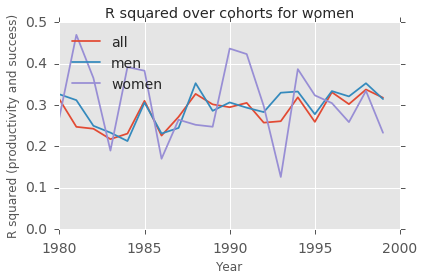

In [24]:
for group in ['all', 'men', 'women']:
    temp = results[results.group == group]
    plt.plot(temp['year'], temp['r_value'], label=group)
plt.xlabel("Year")
plt.ylabel("R squared (productivity and success)")
plt.title("R squared over cohorts for " + group)
plt.ylim((0,0.5))
plt.legend()
plt.show()

C:\Users\wagnerca\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


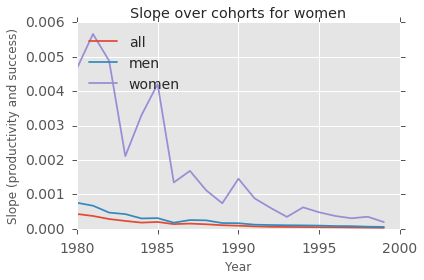

In [25]:
for group in ['all', 'men', 'women']:
    temp = results[results.group == group]
    plt.plot(temp['year'], temp['slope'], label=group)
plt.xlabel("Year")
plt.ylabel("Slope (productivity and success)")
plt.title("Slope over cohorts for " + group)
plt.legend()
plt.show()

In [26]:
results.head()

,year,num_obs,group,slope,intercept,r_value,p_value,std_err
0,1980.0,1361.0,all,0.000431,-0.000036,0.313998,1.598583e-32,0.000035
1,1980.0,782.0,men,0.000758,-0.000108,0.325885,8.350330e-21,0.000079
2,1980.0,101.0,women,0.004656,0.002156,0.269597,6.403575e-03,0.001672
3,1981.0,1536.0,all,0.000373,-0.000012,0.246997,8.789008e-23,0.000037
4,1981.0,870.0,men,0.000671,-0.000059,0.311646,4.754907e-21,0.000069


In [27]:
credible_authors.reset_index(inplace=True)

In [28]:
# #print(credible_authors.head(n=1))
# credible_authors[credible_authors['author'] == 'donatella sciuto'].head(5)

# #print("-----------------------------------------")
# #print(authorPublicationData.head(n=1))

# authorPublicationData[authorPublicationData['author'] == 'donatella sciuto'].head(5)


temp = authorPublicationData.groupby(['year','author']).count().reset_index()
temp = temp.rename(columns={'pub_id':'num_pub'}, inplace=False)

# #print(temp[temp['author'] == 'donatella sciuto'].head(3))


authorPublicationData = temp.merge(credible_authors, how="inner", on=["author"])

# print(authorPublicationData[authorPublicationData['author'] == 'donatella sciuto'].head(3))

# authorPublicationData.shape



groupByYearData = calculate.groupDataAndCalculateCumulativeValues(authorPublicationData, 1, 'num_pub')

# #print(np.unique(groupByYearData['gender']))
authorPublicationData['gender'] = authorPublicationData['gender'].fillna('none')


years = groupByYearData['year'].unique()
years = sorted(years)
END_YEAR = 2018
CAREER_LENGTH = 5
cohort_start_years = [y for y in years if y < (END_YEAR - MAX_CAREER_LENGTH_COHORT)]

# # here is a bug; total_num_pub of this author is 349; num_pub and cum_num_pub should only contain publications in "year"
# print(groupByYearData.head(n=1))
# print(groupByYearData[groupByYearData['author'] == 'donatella sciuto'].head(3))
# print(np.unique(groupByYearData["year"]))

C:\Users\wagnerca\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


plot_cohort_size_gini_cor ---  unique_career_ages:
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.]


C:\Users\wagnerca\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


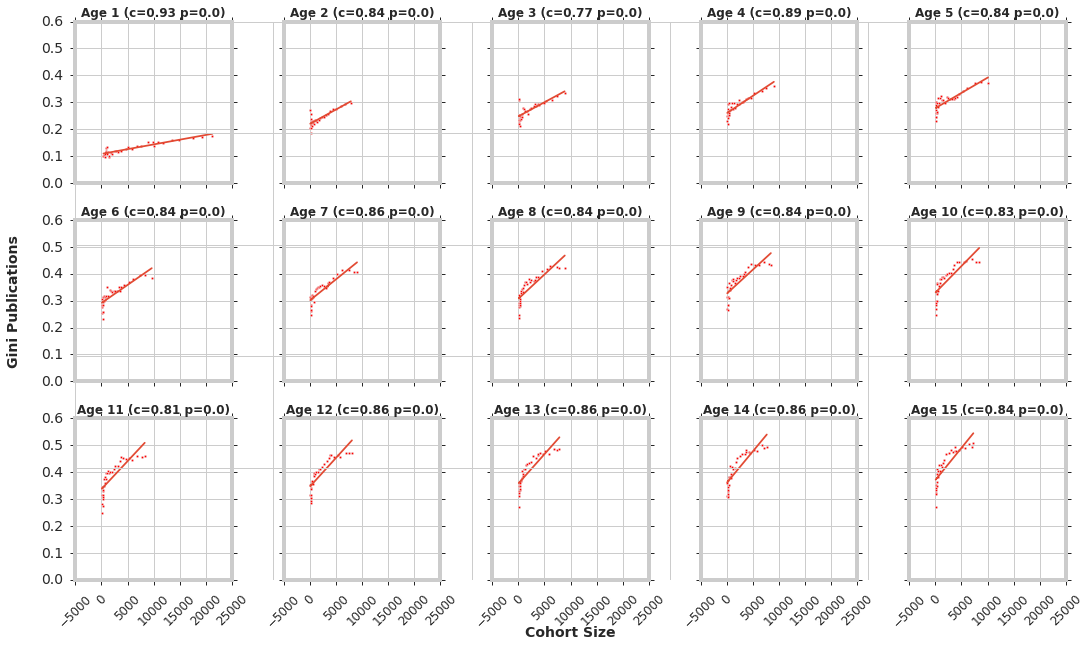

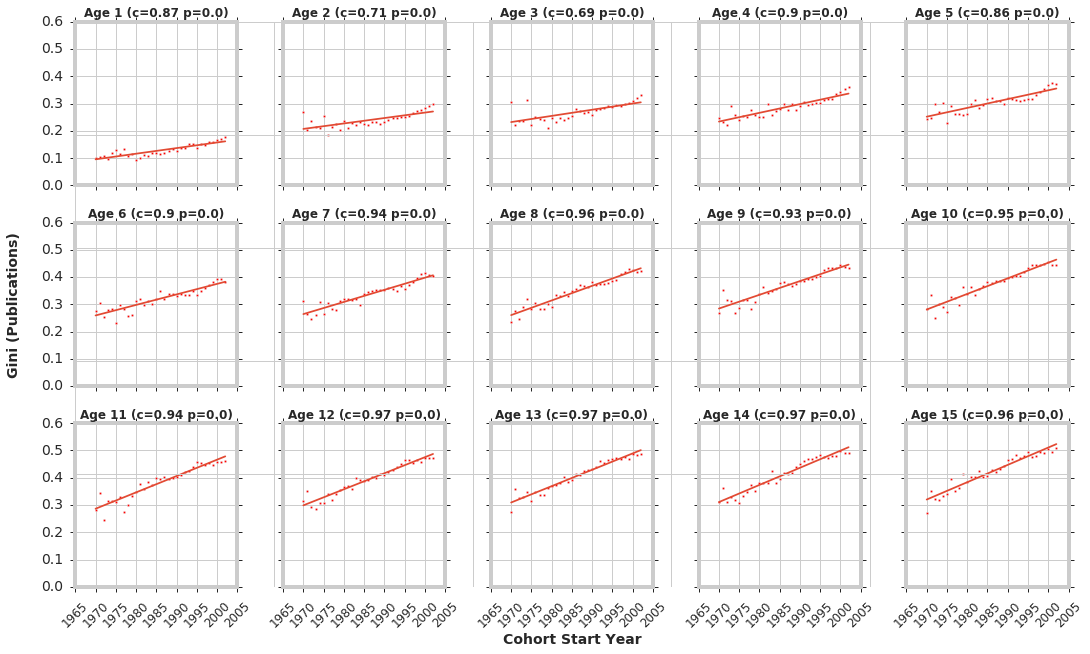

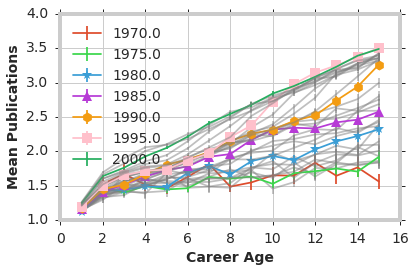

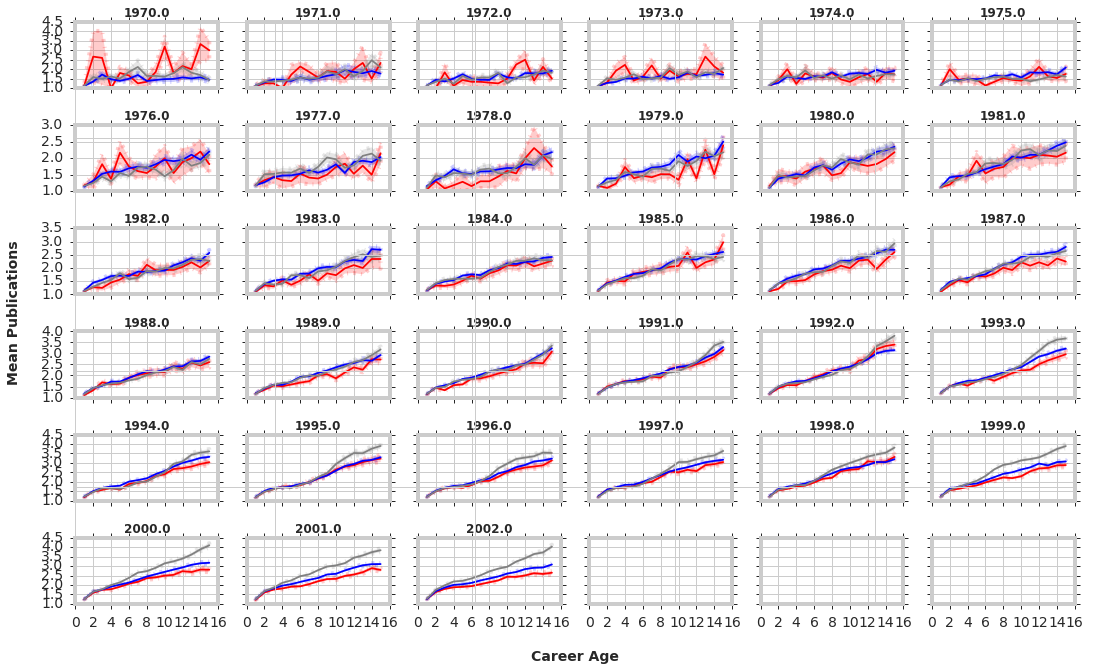

In [29]:
plot.run_cohort_analysis(groupByYearData, cohort_start_years, MAX_CAREER_LENGTH_COHORT, "num_pub", "Publications")  

C:\Users\wagnerca\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


plot_cohort_size_gini_cor ---  unique_career_ages:
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.]


C:\Users\wagnerca\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


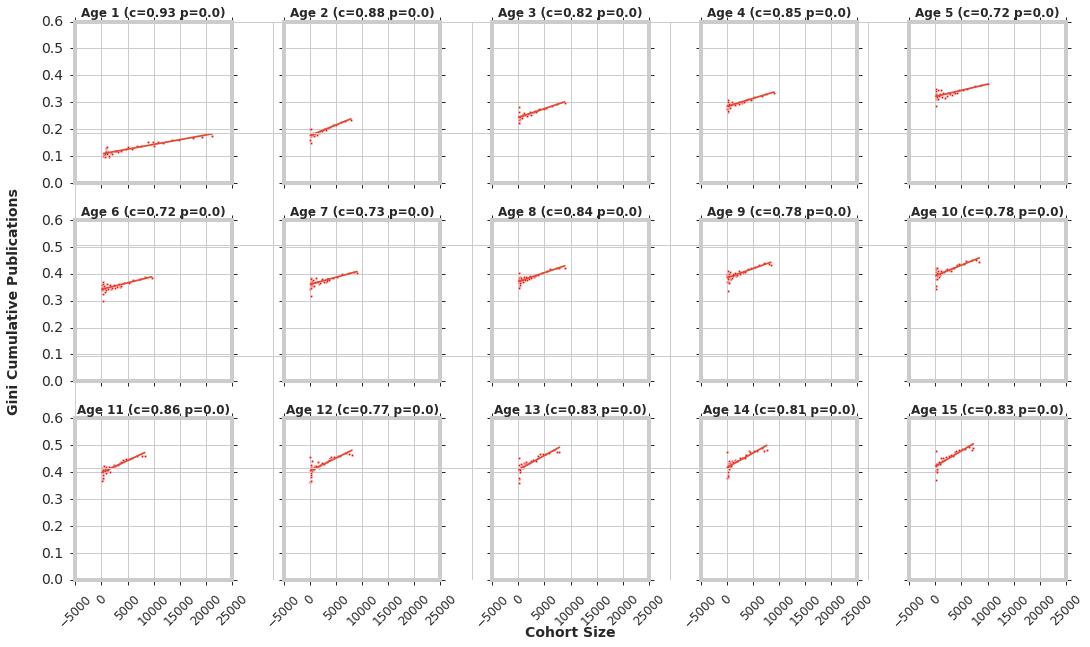

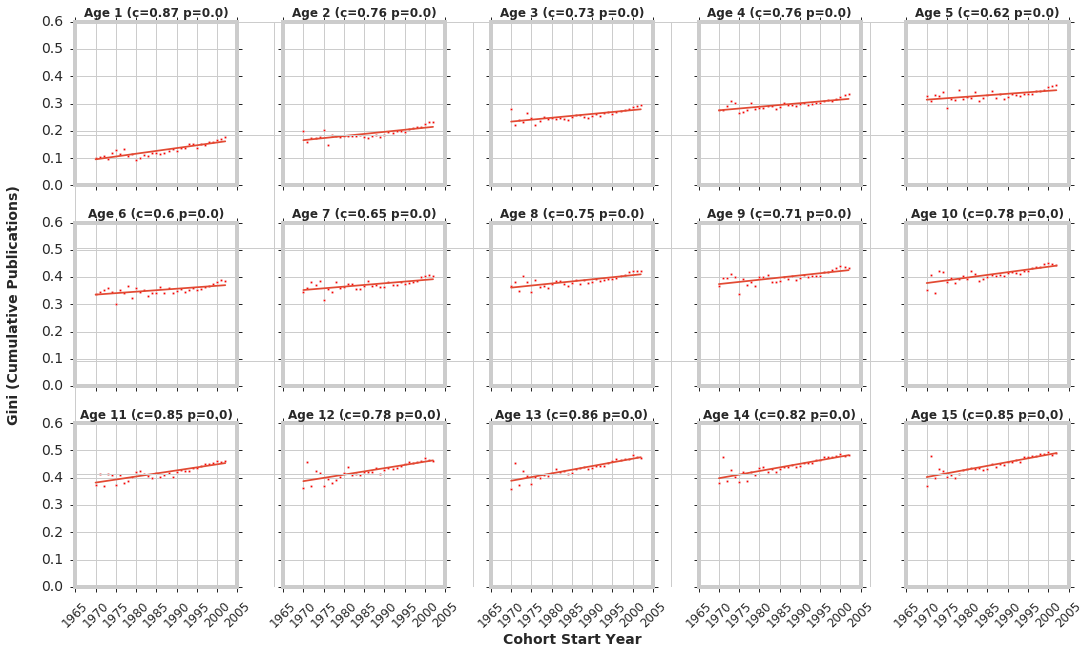

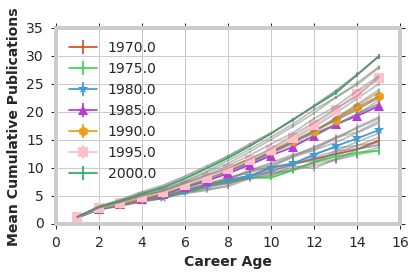

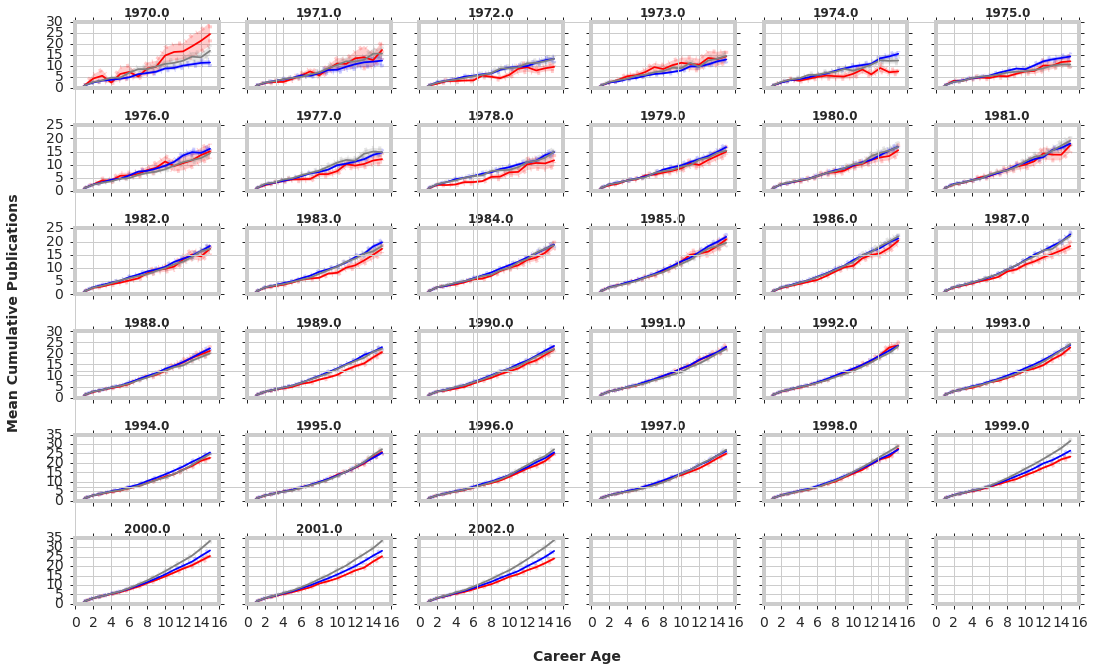

In [30]:
plot.run_cohort_analysis(groupByYearData, cohort_start_years, MAX_CAREER_LENGTH_COHORT, "cum_num_pub", "Cumulative Publications")  